### Bermudan option

__Redwan Mekrami__

The main code is to find in the attached python files (utils and MC_and_finite). Please make sure that they are ine the same folder as this notebook 


In [1]:
# imports 
import numpy as np
import time
import matplotlib.pyplot as plt
import scipy.stats as sps
import math

from utils import *
from MC_and_finite_diff import * 

In [2]:
#parameters 
r=0.05
sigma=0.2
t=[0,1/3,2/3,1]
K=100

### Monte Carlo Estimators 

Text(0, 0.5, 'Put value')

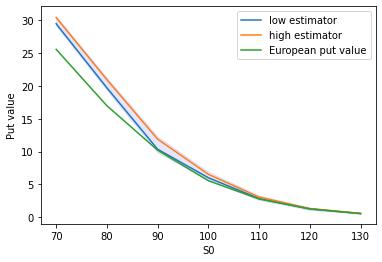

In [3]:
low_est = []
high_est = []
std_low = []
std_high = []
euro_val = []
s = list(range(70,134,10))
m = 100
for S0 in s: 
    high_list = np.zeros(m)
    low_list = np.zeros(m)
    exec_time = 0
    for iter in range (m):
        #print(iter)
        v,u, time_one_iter= MC_estimator(S0, r, sigma,t,K,b=10, h=put)
        high_list[iter] = u
        low_list[iter] = v
        exec_time += time_one_iter
    low_est.append(low_list.mean())
    high_est.append(high_list.mean())
    std_low.append(low_list.std())
    std_high.append(high_list.std())
    euro_val.append(P(K, sigma, 1, S0,r))


plt.plot(s, low_est, label = "low estimator")
plt.plot(s, high_est, label = "high estimator")
plt.plot(s, euro_val, label = "European put value")
plt.fill_between(s, (np.array(low_est)-1.96*np.array(std_low)/np.sqrt(m)),
                 (np.array(high_est)+1.96*np.array(std_high)/np.sqrt(m)), color='b', alpha=.1)
plt.legend()
plt.xlabel('S0')
plt.ylabel('Put value')

3
10
20
30
40
50


No handles with labels found to put in legend.


Text(0, 0.5, 'Execution time')

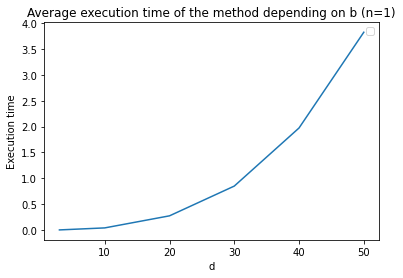

In [4]:
bs = [3,10,20,30,40, 50]
exec_times =[]
n = 10
for b in bs: 
    print(b)
    exec_time = 0
    for iter in range (n):
        v,u, time_one_iter= MC_estimator(S0, r, sigma,t,K,b, h=put)
        exec_time += time_one_iter
    exec_times.append(exec_time/n)


plt.plot(bs, exec_times)
plt.title('Average execution time of the method depending on b (n=1)')
plt.legend()
plt.xlabel('d')
plt.ylabel('Execution time')



In [6]:
low_est = []
high_est = []
std_low = []
std_high = []
exec_times = []
euro_val = P(100, 0.2, 3,98, 0.05)
bs = [3,10,20,30,50,70]
m = 100
for b in bs: 
    high_list = np.zeros(m)
    low_list = np.zeros(m)
    exec_time = 0
    for iter in range (m):
        #print(iter)
        low_list[iter],high_list[iter],time_one_iter= MC_estimator(
            S0=98, r=0.05, sigma=0.2, t=[0,1,2,3],K=100,b=b, h=put)
        exec_time += time_one_iter
    low_est.append(low_list.mean())
    high_est.append(high_list.mean())
    std_low.append(low_list.std())
    std_high.append(high_list.std())
    
    exec_times.append(exec_time)


Text(0, 0.5, 'Put value')

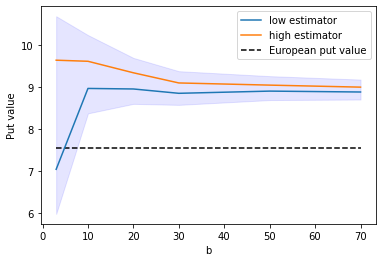

In [7]:

plt.plot(bs, low_est, label = "low estimator")
plt.plot(bs, high_est, label = "high estimator")
plt.fill_between(bs, (np.array(low_est)-1.96*np.array(std_low)/np.sqrt(m)),
                 (np.array(high_est)+1.96*np.array(std_high)/np.sqrt(m)), color='b', alpha=.1)

plt.hlines(euro_val, bs[0], bs[-1],'black','--', label='European put value')

plt.legend()
plt.xlabel('b')
plt.ylabel('Put value')

Text(0, 0.5, 'Put value')

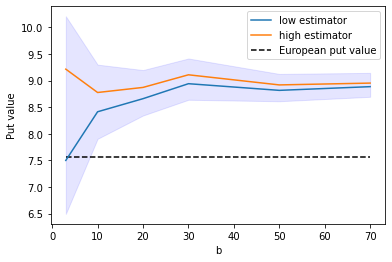

In [24]:
low_est_pr = []
high_est_pr = []
std_low_pr = []
std_high_pr = []
exec_times_pr = []
bs = [3,10,20,30,50,70]
m = 100
for b in bs: 
    high_list_pr = np.zeros(m)
    low_list_pr = np.zeros(m)
    exec_time = 0
    for iter in range (m):
        #print(iter)
        low_list[iter],high_list[iter],time_one_iter= MC_estimator_euro_pruning(
            S0=98, r=0.05, sigma=0.2, t=[0,1,2,3],K=100,b=b, h=put, euro_val=P)
        exec_time += time_one_iter
        
    low_est_pr.append(low_list.mean())
    high_est_pr.append(high_list.mean())
    std_low_pr.append(low_list.std())
    std_high_pr.append(high_list.std())
    exec_times_pr.append(exec_time)

    
    

plt.plot(bs, low_est_pr, label = "low estimator")
plt.plot(bs, high_est_pr, label = "high estimator")
plt.fill_between(bs, (np.array(low_est_pr)-1.96*np.array(std_low_pr)/np.sqrt(m)),
                 (np.array(high_est_pr)+1.96*np.array(std_high_pr)/np.sqrt(m)), color='b', alpha=.1)

plt.hlines(euro_val, bs[0], bs[-1],'black','--', label = 'European put value')

plt.legend()
plt.xlabel('b')
plt.ylabel('Put value')


Text(0, 0.5, 'Put value')

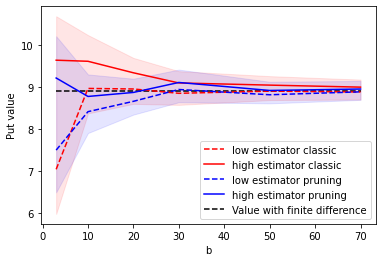

In [25]:
s, u, _=finite_differences(0.05, 0.2, [0,1,2,3], 100, put,1/2, np.log(310), -5, m=2000, l=600)
v_fd = get_interpolated_value(98, s, u, 600, -5, np.log(310))


plt.plot(bs, low_est, 'r--', label = "low estimator classic")
plt.plot(bs, high_est,'r', label = "high estimator classic")
plt.fill_between(bs, (np.array(low_est)-1.96*np.array(std_low)/np.sqrt(m)),
                 (np.array(high_est)+1.96*np.array(std_high)/np.sqrt(m)), color='r', alpha=.1)

plt.plot(bs, low_est_pr,'b--' ,label = "low estimator pruning")
plt.plot(bs, high_est_pr,'b' ,label = "high estimator pruning")
plt.fill_between(bs, (np.array(low_est_pr)-1.96*np.array(std_low_pr)/np.sqrt(m)),
                 (np.array(high_est_pr)+1.96*np.array(std_high_pr)/np.sqrt(m)), color='b', alpha=.1, )

plt.hlines(v_fd, bs[0], bs[-1],'black','--', label = 'Value with finite difference')

plt.legend()
plt.xlabel('b')
plt.ylabel('Put value')

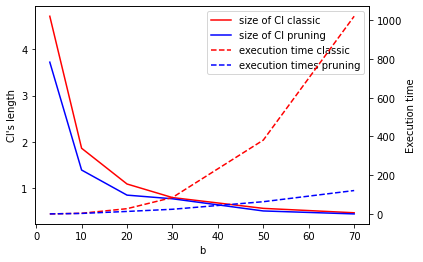

In [26]:

CI_size = np.array(high_est)+1.96*np.array(std_high)/np.sqrt(m) - (
    np.array(low_est)-1.96*np.array(std_low)/np.sqrt(m))
CI_size_pr = np.array(high_est_pr)+1.96*np.array(std_high_pr)/np.sqrt(m) - (
    np.array(low_est_pr)-1.96*np.array(std_low_pr)/np.sqrt(m))

figure, axis_1 = plt.subplots()

axis_1.plot(bs, CI_size,'r' ,label='size of CI classic')
axis_1.plot(bs, CI_size_pr,'b' ,label= 'size of CI pruning')
axis_1.set_xlabel('b')
axis_1.set_ylabel("CI's length")
axis_2 = axis_1.twinx()
axis_2.plot(bs, exec_times,'r--' ,label='execution time classic')
axis_2.plot(bs, exec_times_pr,'b--' ,label = 'execution times pruning')
axis_2.set_ylabel('Execution time')

lines_1, labels_1 = axis_1.get_legend_handles_labels()
lines_2, labels_2 = axis_2.get_legend_handles_labels()

lines = lines_1 + lines_2
labels = labels_1 + labels_2

axis_1.legend(lines, labels, loc=0)




### Finite difference 

2.1437530517578125

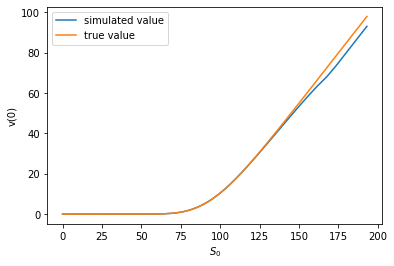

In [11]:
# Comparison with true value for a call
theta=0
beta = np.log(2*K)
alpha = -beta
s,u_res,execution_time = finite_differences(r, sigma, t, K, call,theta, beta, alpha, m=1000, l=300)
u_res[u_res < 1e-15] = 0 

tr_prices = C(K, sigma, t[-1], s,r) #true val
tr_prices[tr_prices < 1e-15] = 0   
    
plt.plot(s, u_res, label="simulated value")
plt.plot(s,tr_prices, label='true value')  
plt.xlabel('$S_0$')
plt.ylabel('v(0)')
plt.legend()
execution_time

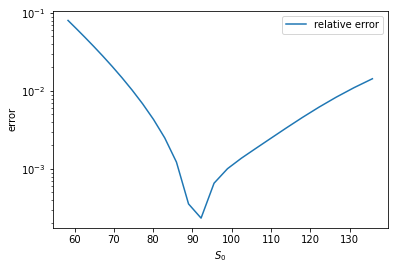

In [12]:
#Error
plt.plot(s[265:290],np.abs(u_res-tr_prices)[265:290]/tr_prices[265:290], label='relative error')
plt.yscale('log')
plt.xlabel('$S_0$')
plt.ylabel('error')
plt.legend()

2.161011219024658

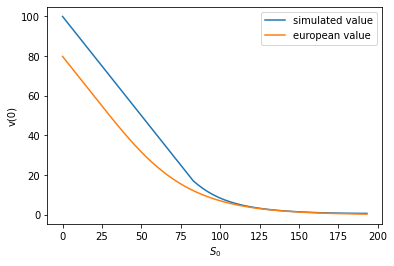

In [13]:
# Comparison with european value for a put and MC estimators
theta=0
beta = np.log(2*K)
alpha = -beta
t = np.arange(0,5,1/2)
s,u_res,execution_time = finite_differences(r, sigma, t, K, put,theta, beta, alpha, m=1000, l=300)
u_res[u_res < 1e-15] = 0 

euro_prices = P(K, sigma, t[-1], s,r) #true val
euro_prices[euro_prices < 1e-15] = 0   


plt.plot(s , u_res, label="simulated value")
plt.plot(s ,euro_prices , label='european value')  
#plt.plot(s[270:290] , u_res[270:290], label="simulated value")
#plt.plot(s[270:290] ,euro_prices[270:290] , label='european value')  
#plt.plot(np.arange(70,131,10), low_est, label='low MC estimator')
#plt.plot(np.arange(70,131,10), high_est, label='high MC estimator')
plt.xlabel('$S_0$')
plt.ylabel('v(0)')
plt.legend()
execution_time

### 2 assets 

In [15]:
s1,s2,u,ex_t = finite_differences_2assets(r=0, sigma=0.2, t=[0,1,2,3],K=100, g=put_min ,beta1=np.log(310), alpha1=-5,
                                          beta2 = np.log(310), alpha2=-5,  m=2000, l1=600, l2=600)

print(f'v(0, ({s1[535]},{s2[535]})) = {u[535,535]}') 
print('Execution time', ex_t)

v(0, (97.06481528358563,97.06481528358563)) = 24.25096133504448
Execution time 34.16097903251648


Text(0.5, 0, 'z')

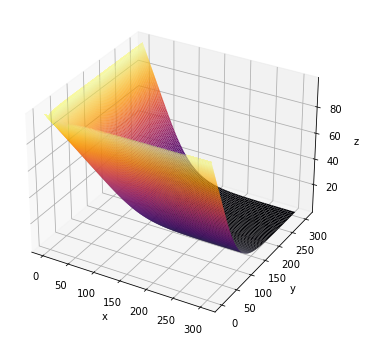

In [16]:
# create grid
X, Y = np.meshgrid(s1, s2)
# create figure container
fig = plt.figure(figsize=(9, 6))
ax = plt.axes(projection = '3d')
# 3d contour plot
ax.plot_surface(X, Y, u, rstride = 1, cstride = 1, cmap = 'inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# set point of view, altitude and azimuthal axis
#ax.view_init(60, 95)


In [17]:
m=100
high_list_multi = np.zeros(m)
low_list_multi = np.zeros(m)
exec_time_multi = 0
for iter in range (m):
    #print(iter)
    low_list_multi[iter],high_list_multi[iter],time_one_iter= MC_estimator_2assets([98,98],0, 0.2,t=[0,1,2,3],K=100,b=20, h=put_min)
    exec_time_multi += time_one_iter
low_est_multi = low_list_multi.mean()
high_est_multi = high_list_multi.mean()
low_bound = low_est_multi - 1.96/np.sqrt(m) * low_list_multi.std()
high_bound = high_est_multi + 1.96/np.sqrt(m) * high_list_multi.std()

print('Low estimator', low_est_multi)
print('High estimator', high_est_multi)
print('95% CI',[low_bound, high_bound] )
print('Execution time', exec_time_multi)

Low estimator 23.567917670894094
High estimator 24.137284832756293
95% CI [23.152945816327264, 24.561220641123803]
Execution time 36.73199152946472
